---
title: "Random Mosaic Augmentation"
description: "In this tutorial we will show how we can quickly perform **mosaicing** using the features provided by the [`kornia.augmentation.RandomMosaic`](https://kornia.readthedocs.io/en/latest/augmentation.module.html#kornia.augmentation.RandomMosaic) API.
**Mosaicing** means taking several input images and combine their random crops into mosaic."
author:
    - "Jian Shi"
date: 08-29-2022
categories:
    - Basic
    - 2D
    - Data augmentation
    - kornia.augmentation
image: "../tutorials/assets/data_augmentation_mosiac.png"
---

<a href="https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/nbs/data_augmentation_mosiac.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in google colab"></a>

In [ ]:
%%capture
!pip install kornia
!pip install kornia-rs

## Install and get data

We install Kornia and some dependencies, and download a simple data sample

In [ ]:
import io

import requests


def download_image(url: str, filename: str = "") -> str:
    filename = url.split("/")[-1] if len(filename) == 0 else filename
    # Download
    bytesio = io.BytesIO(requests.get(url).content)
    # Save file
    with open(filename, "wb") as outfile:
        outfile.write(bytesio.getbuffer())

    return filename


url = "https://raw.githubusercontent.com/kornia/data/main/panda.jpg"
download_image(url)

'panda.jpg'

In [ ]:
import kornia as K
import torch
from matplotlib import pyplot as plt


def plot(img, box):
    img_vis = img.clone()
    img_vis = K.utils.draw_rectangle(img_vis, box, color=torch.tensor([255, 0, 0]))
    plt.imshow(K.tensor_to_image(img_vis))
    plt.show()

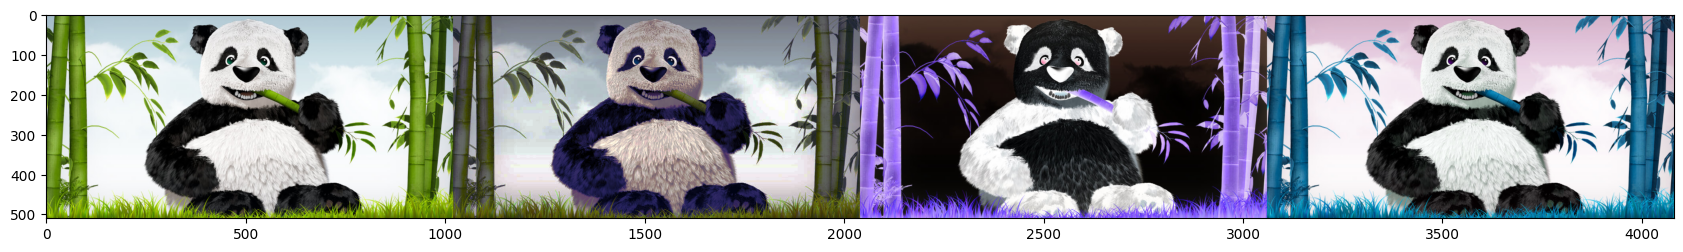

In [ ]:
img1 = K.io.load_image("panda.jpg", K.io.ImageLoadType.RGB32)
img2 = K.augmentation.RandomEqualize(p=1.0, keepdim=True)(img1)
img3 = K.augmentation.RandomInvert(p=1.0, keepdim=True)(img1)
img4 = K.augmentation.RandomChannelShuffle(p=1.0, keepdim=True)(img1)

plt.figure(figsize=(21, 9))
plt.imshow(K.tensor_to_image(torch.cat([img1, img2, img3, img4], dim=-1)))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


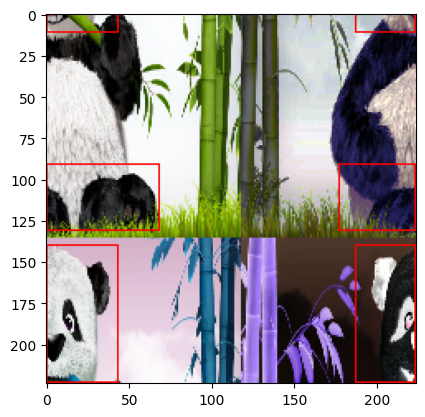

In [ ]:
import kornia as K
import torch
from kornia.augmentation import RandomMosaic

x = K.core.concatenate(
    [
        K.geometry.resize(img1[None], (224, 224)),
        K.geometry.resize(img2[None], (224, 224)),
        K.geometry.resize(img3[None], (224, 224)),
        K.geometry.resize(img4[None], (224, 224)),
    ]
)

boxes = torch.tensor(
    [
        [
            [70.0, 5, 150, 100],  # head
            [60, 180, 175, 220],  # feet
        ]
    ]
).repeat(4, 1, 1)

aug = RandomMosaic(
    (224, 224), mosaic_grid=(2, 2), start_ratio_range=(0.3, 0.5), p=1.0, min_bbox_size=300, data_keys=["input", "bbox_xyxy"]
)

y, y1 = aug(x, boxes)

plot(y[:1], y1[:1])